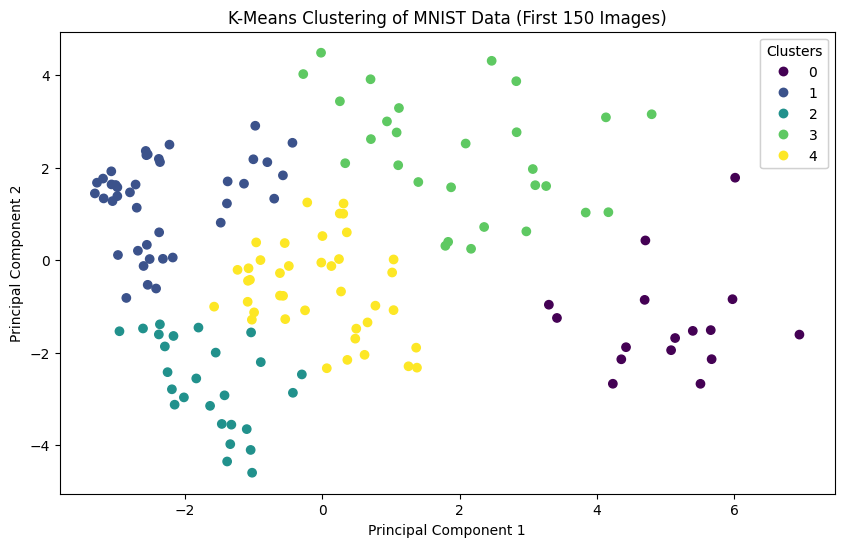

Cluster labels: [0, 3, 6, 3, 5]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from skimage import io, color, transform

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract data and labels
x = mnist['data'].values[:150]
y = mnist['target'].values[:150]

# Normalize the data
x = x / 255.0

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(x_pca)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis')

# Add legend with cluster labels
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of MNIST Data (First 150 Images)')
plt.show()

# Assigning labels to clusters based on average digits
def label_clusters(clusters):
    # Calculate the average digit for each cluster
    cluster_labels = []
    for i in range(kmeans.n_clusters):
        cluster_indices = np.where(clusters == i)[0]
        cluster_digits = y[cluster_indices].astype(int)
        average_digit = int(np.mean(cluster_digits))
        cluster_labels.append(average_digit)
    return cluster_labels

# Get the labels for each cluster
cluster_labels = label_clusters(clusters)
print('Cluster labels:', cluster_labels)

In [18]:
def classify_new_image(image_path, pca, kmeans):
    image = io.imread(image_path)
    image_gray = color.rgb2gray(image)
    image_resized = transform.resize(image_gray, (28, 28), anti_aliasing=True)
    image_normalized = image_resized / 255.0
    image_flattened = image_normalized.reshape(1, -1)
    image_pca = pca.transform(image_flattened)
    cluster = kmeans.predict(image_pca)
    return cluster

image_path = 'apple_01.jpg' 

predicted_cluster = classify_new_image(image_path, pca, kmeans)
print('Predicted cluster for the new image:', predicted_cluster[0])
print('Label for predicted cluster:', cluster_labels[predicted_cluster[0]])

Predicted cluster for the new image: 1


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot images
def plot_images(images, labels, class_names, num_images=20):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select a subset of 20 images
num_images = 20
indices = np.random.randint(0, len(x_train), size=num_images)
sample_images = x_train[indices]
sample_labels = y_train[indices]

# Plot the sample images
plot_images(sample_images, sample_labels, class_names, num_images)

ModuleNotFoundError: No module named 'tensorflow.python'